# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [4]:
df = pd.read_csv("bank-additional-full.csv", sep =";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True, dtype=int)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True, dtype=int)
X = df.drop(["y"], axis = 1)

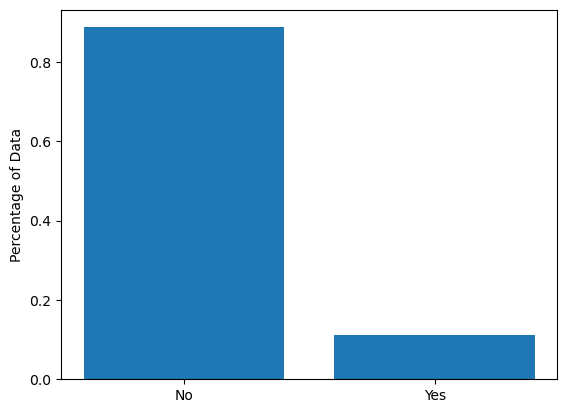

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############
# # Here you must deciee what to do with the data (SMOTE or oversample) use here
# X_scaled = #???
# y_train = #???

SyntaxError: invalid syntax (4282377090.py, line 5)

In [12]:
## Import
from imblearn.over_sampling import SMOTE

## Import Smote Package
smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [13]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(smote_X, smote_y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.192\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.283\nsamples = 19205\nvalue = [15925.0, 3280.0]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.108\nsamples = 10564\nvalue = [9959, 605]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.09\nsamples = 10359\nvalue = [9868, 491]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 205\nvalue = [91.0, 114.0]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.427\nsamples = 8641\nvalue = [5966, 2675]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.485\nsamples = 6272\nvalue = [3675, 2597]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.064\nsamples = 2369\nvalue = [2291, 78]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.422\nsamples = 31955\nvalue = [9655, 22300]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.696\ngini = 0.342\nsamples = 26276\nvalue = [5749, 20527]\

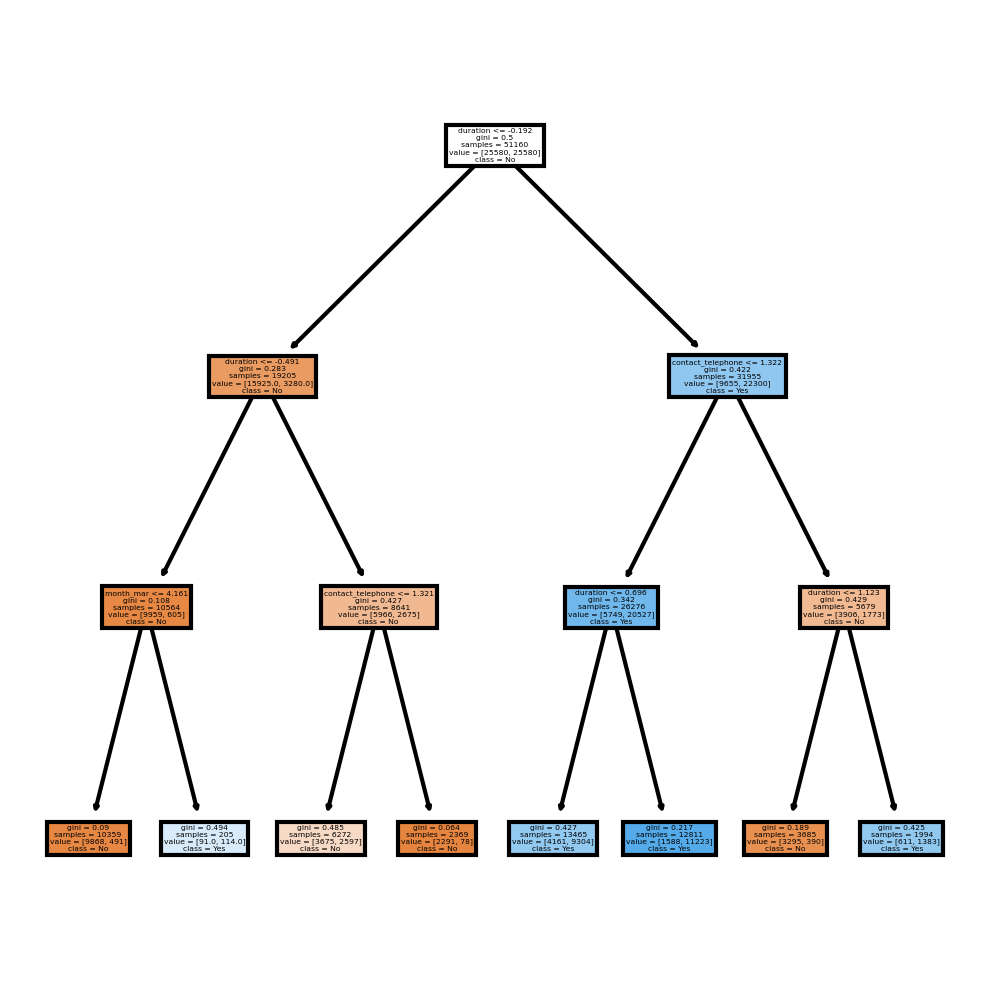

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])

#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [15]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

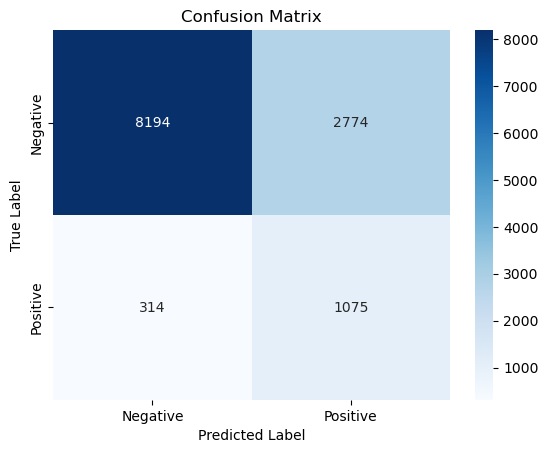

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [17]:
# Placeholder for optimizing max depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [18]:
bagging = BaggingClassifier(estimator = dtree,
                 n_estimators = 100, 
                 max_samples = .5,
                 max_features = .1)



In [19]:
bagging.fit(smote_X, smote_y)

y_pred = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


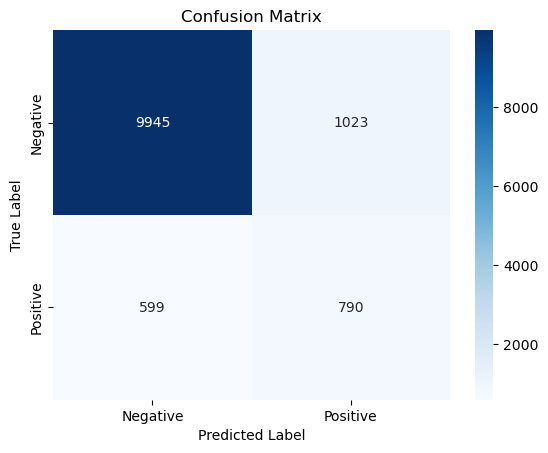

In [20]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
# Placeholder for optimizing max depth
dtree = DecisionTreeClassifier(max_depth = 3)
boost= AdaBoostClassifier(estimator= dtree,
                         n_estimators = 100, 
                         learning_rate = .5)

boost.fit(smote_X, smote_y)
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


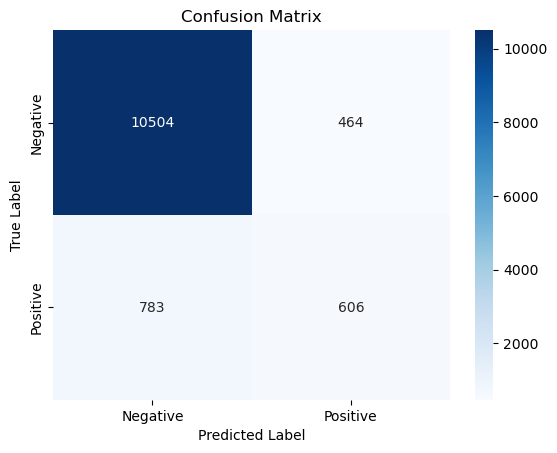

In [23]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Train a Logistic Regression (Super Learner) on Boosted Tree, Bagged Tree

#Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM. -- Old task

In [ ]:
#pip install mlens

In [24]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier

# from mlens.ensemble import SuperLearner

In [25]:
base_predictions = [list(dtree_main.predict(smote_X)),
                    list(boost.predict(smote_X)),
                    list(bagging.predict(smote_X))]

In [26]:
np.array(base_predictions) # Look at which agree and disagree with one another

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [27]:
np.array(base_predictions)[:,0]

array([0, 0, 0])

In [ ]:
#np.array(base_predictions)[:,i] for i in range(len(base_predictions[0]))

In [28]:
n = len(base_predictions[0])

In [29]:
for i in range(n):
    print(np.array(base_predictions)[:,i])

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[1 1 1]
[1 1 1]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[1 0 1]
[1 1 1]
[1 0 1]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[1 1 1]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[1 0 1]
[1 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 1]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[1 1 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[1 0 1]


[1 0 0]
[0 0 0]
[1 0 1]
[1 1 1]
[0 0 0]
[1 1 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 1 1]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[1 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[1 1 1]
[1 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[1 0 0]
[1 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[1 0 1]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[1 1 1]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 1]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[1 1 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[1 1 1]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 1 0]
[1 0 1]
[0 0 0]
[1 0 0]
[0 0 0]
[1 0 1]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]



KeyboardInterrupt



In [ ]:
# new_base_predictions = [np.array(base_predictions)[:,i] for i in range(n)] # forced way

In [34]:
new_base_predictions = np.array(base_predictions).transpose() # Must easier way than above

In [35]:
new_base_predictions

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [31]:
super_learner = LogisticRegression()

In [37]:
super_learner.fit(new_base_predictions, smote_y)

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
super_learner.coef_ 

#Decision Tree shouldn't be the best if resampling is done well
# coef = are the coefficients of our different models, higher means more relationship or weight

# The coef with the highest value possess the greatest predictive power in the model 
# in relation to the other models that are present (overall each might be very good)

# Decision Tree 1st beta, Boost 2nd beta, Bagging 3rd beta

array([[0.93002757, 4.5737509 , 1.37412   ]])

Here we see that the different coefficients which each indicate the predictive power of each of our 3 models relative to one another. The Decision Tree model has the least predictive power. Boost has the greatest predictive power relative to all others, and bagging has the second greatest predictive power relative to the rest.

# 6.)